In [15]:
from elasticsearch import Elasticsearch 
import elasticsearch_dsl 
from elasticsearch_dsl import Document, Text, Document, Search 
import os 
import regex 
import tarfile
import time
import spacy 
from spacy.lang.pl import Polish 
from spacy.attrs import ORTH, LEMMA 

from collections import Counter
import pprint


In [16]:
client = Elasticsearch() 

In [17]:
client.info()

ConnectionError: ConnectionError(<urllib3.connection.HTTPConnection object at 0x7fcb7667caf0>: Failed to establish a new connection: [Errno 111] Connection refused) caused by: NewConnectionError(<urllib3.connection.HTTPConnection object at 0x7fcb7667caf0>: Failed to establish a new connection: [Errno 111] Connection refused)

In [4]:
client.cat.plugins()

ConnectionError: ConnectionError(<urllib3.connection.HTTPConnection object at 0x7fcb7687a850>: Failed to establish a new connection: [Errno 111] Connection refused) caused by: NewConnectionError(<urllib3.connection.HTTPConnection object at 0x7fcb7687a850>: Failed to establish a new connection: [Errno 111] Connection refused)

In [5]:
def read_archive(path):
    tar = tarfile.open(path, "r:gz")   
    files = {}
    for filename in tar.getnames():
        f = tar.extractfile(filename)
        files[filename] = f.read().decode("utf-8").replace('\n', ' ').replace('\t', ' ')
    return files

In [6]:
files = read_archive('./ustawy.tar.gz')


FileNotFoundError: [Errno 2] No such file or directory: './ustawy.tar.gz'

# Zad 1
Make sure the texts in the corpus does not contain HTML code.

In [7]:

for filename, file in files.items(): 
    res = regex.findall(r'(.{0,20})<(.{0,25})' , file, flags=regex.IGNORECASE) 
    if len(res) > 0:
        print(filename, res)
        

NameError: name 'files' is not defined

In [8]:
files['2001_1353.txt'] = files['2001_1353.txt'].replace('< < tajne > >', 'tajne')

NameError: name 'files' is not defined

In [9]:

for filename, file in files.items(): 
    res = regex.findall(r'(.{0,20})<(.{0,25})' , file, flags=regex.IGNORECASE) 
    if len(res) > 0:
        print(filename, res)

NameError: name 'files' is not defined

# Zad 2
Use SpaCy tokenizer API to tokenize the text from the cleaned law corpus

In [10]:
nlp = Polish() 
# Create a Tokenizer with the default settings for Polish 
# including punctuation rules and exceptions 
tokenizer = nlp.tokenizer

In [11]:
tokens = {key:list(tokenizer(val)) for key, val in files.items()}

NameError: name 'files' is not defined

In [12]:
print(list(tokens.items())[1])

NameError: name 'tokens' is not defined

# Zad 3
Compute frequency list for each of the processed files.

In [13]:
freqs = {}
for filename, tok in tokens.items():
    freqs[filename] = Counter([t.text.lower() for t in tok])

NameError: name 'tokens' is not defined

In [14]:
for i, (filename, toks) in zip(range(10),freqs.items()):
    print(filename, toks.most_common(5))

# Zad 4
Aggregate the result to obtain one global frequency list.

In [74]:
aggregated = Counter()
for _, freq in freqs.items():
    aggregated.update(freq)

In [75]:
print(aggregated.most_common(10))

[('.', 437694), (',', 341126), ('w', 201224), (')', 100194), ('i', 90009), ('art', 83804), ('z', 82443), ('1', 73108), ('o', 64776), ('-', 61714)]


# Zad 5
Reject all entries that are shorter than 2 characters or contain non-letter characters (make sure to include Polish diacritics).

In [76]:
for c in 'zażółćgęśląjaźń':
    assert(tokenizer(c)[0].is_alpha)

In [87]:
filtered_aggr = Counter()
for filename, tok in tokens.items():
    filtered_aggr.update([t.text.lower()for t in tok if len(t.text) >= 3 and t.is_alpha])

In [88]:
print(filtered_aggr.most_common(10))

[('art', 83804), ('ust', 53636), ('się', 45886), ('lub', 45800), ('poz', 45224), ('oraz', 33558), ('mowa', 28783), ('nie', 22990), ('przez', 20953), ('pkt', 19124)]


# Zad 6
Make a plot in a logarithmic scale (for X and Y):

    X-axis should contain the rank of a term, meaning the first rank belongs to the term with the highest number of occurrences; the terms with the same number of occurrences should be ordered by their name,
    Y-axis should contain the number of occurrences of the term with given rank.


In [89]:
from matplotlib import pyplot as plt

In [98]:
sorted_freqs = sorted(filtered_aggr.items(), key=lambda x: x[1], reverse=True)

In [99]:
sorted_freqs

[('art', 83804),
 ('ust', 53636),
 ('się', 45886),
 ('lub', 45800),
 ('poz', 45224),
 ('oraz', 33558),
 ('mowa', 28783),
 ('nie', 22990),
 ('przez', 20953),
 ('pkt', 19124),
 ('dnia', 17954),
 ('których', 17932),
 ('jest', 13197),
 ('ustawy', 13099),
 ('może', 12096),
 ('jeżeli', 12044),
 ('którym', 11789),
 ('brzmienie', 10576),
 ('spraw', 10021),
 ('otrzymuje', 9835),
 ('albo', 8708),
 ('dodaje', 8423),
 ('ich', 8199),
 ('dla', 7934),
 ('pracy', 7631),
 ('minister', 7580),
 ('której', 7476),
 ('brzmieniu', 7295),
 ('drodze', 7179),
 ('podstawie', 6849),
 ('stosuje', 6680),
 ('przypadku', 6494),
 ('niż', 6452),
 ('tym', 6366),
 ('jego', 6320),
 ('być', 6120),
 ('zakresie', 6098),
 ('właściwy', 6094),
 ('państwa', 5839),
 ('przepisy', 5839),
 ('wyrazy', 5817),
 ('ustawie', 5478),
 ('także', 5445),
 ('przepisów', 5343),
 ('rozporządzenia', 5338),
 ('tych', 5048),
 ('określonych', 5043),
 ('osób', 4904),
 ('postępowania', 4901),
 ('terminie', 4825),
 ('zastępuje', 4818),
 ('działalności'

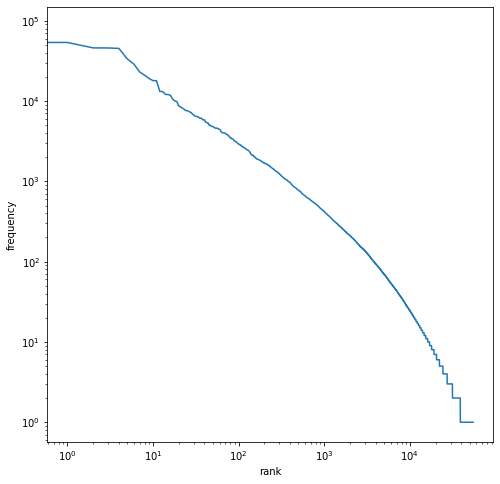

In [103]:
plt.figure(figsize=(8, 8)) 
plt.plot([f[1] for f in sorted_freqs])
plt.xscale('log') 
plt.yscale('log') 
plt.xlabel('rank') 
plt.ylabel('frequency')
plt.show()

# Zad 7
 Install Morfeusz (Binding dla Pythona) and use it to find all words that do not appear in that dictionary.

In [106]:
import morfeusz2 
morf = morfeusz2.Morfeusz()

ModuleNotFoundError: No module named 'morfeusz2'

In [107]:
!pip3 install morfeusz2

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
ERROR: Could not find a version that satisfies the requirement morfeusz2 (from versions: none)
ERROR: No matching distribution found for morfeusz2
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.
